<a href="https://colab.research.google.com/github/FrozenFalcon-Byte/Deep-Learning/blob/main/dropout_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [3]:
X_train = np.linspace(-1, 1, 20)

In [4]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [5]:
X_test = np.linspace(-1, 1, 20)

In [6]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

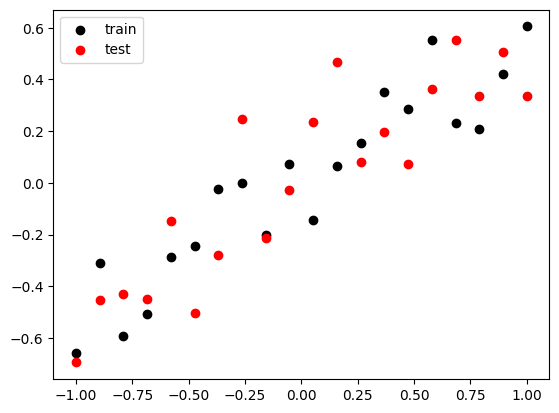

In [7]:
plt.scatter(X_train, y_train, c='black', label='train')
plt.scatter(X_test, y_test, c='red', label='test')
plt.legend()
plt.show()

In [8]:
#Regression
model = Sequential()

In [9]:
model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mse'])

In [12]:
history = model.fit(X_train, y_train, epochs=500, validation_data = (X_test, y_test))

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1300 - mse: 0.1300 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0544 - val_mse: 0.0544
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0402 - val_mse: 0.0402
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0396 - val_mse: 0.0396
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0390 - val_mse: 0.0390
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 0.0163 -

In [13]:
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)

In [14]:
train_mse

0.0046116067096591

In [15]:
test_mse

0.04664256051182747

In [16]:
pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


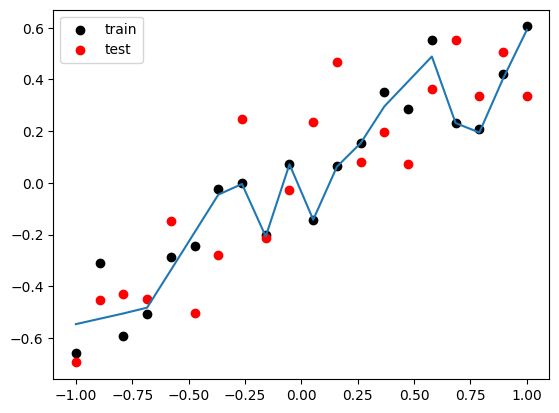

In [22]:
plt.scatter(X_train,y_train, c='black', label='train')
plt.scatter(X_test, y_test, c='red', label='test')
plt.plot(X_test, pred)
plt.legend()

In [21]:
# this curve is just perfect for only the train data and dosent work on the test data since it has captured a lot of small details of train data
# ==> Overfitting

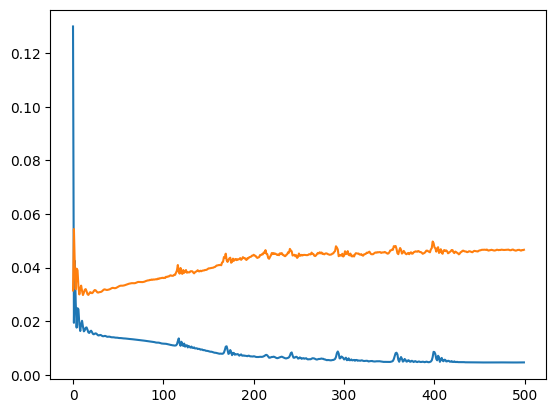

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [39]:
# now lets try with some dropout layers
model = Sequential()

In [40]:
model.add(Dense(128, activation='relu', input_dim=1))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
adam = Adam(learning_rate=0.01)

In [42]:
model.compile(optimizer=adam, loss='mse', metrics=['mse'])

In [43]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step - loss: 0.1543 - mse: 0.1543 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0564 - val_mse: 0.0564
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0459 - val_mse: 0.0459
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0305 - mse: 0.0305 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0389 - val_mse: 0.0389
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.0227 - m

In [44]:
_, train_mse = model.evaluate(X_train, y_train)
_, test_mse = model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0130 - mse: 0.0130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0400 - mse: 0.0400


In [45]:
train_mse

0.012996561825275421

In [46]:
test_mse

0.03997976705431938

In [47]:
# now the training loss has increased
# which means that our model is no more trained on very minute details
# ==> not overfit

In [48]:
pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


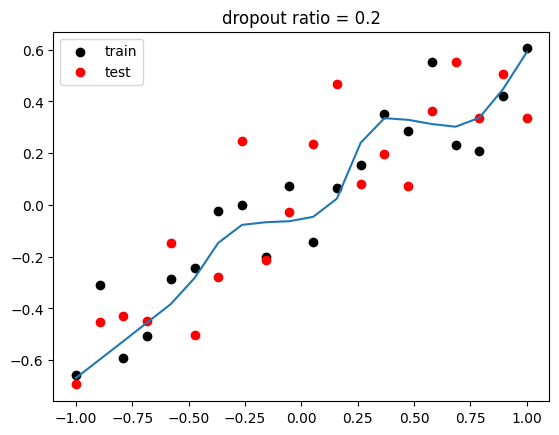

In [49]:
plt.figure()
plt.title("dropout ratio = 0.2")
plt.scatter(X_train, y_train, c='black', label='train')
plt.scatter(X_test, y_test, c='red', label='test')
plt.plot(X_test, pred)
plt.legend()

In [50]:
# now the curve is no more spiky as the above one, its more smooth and predicts more accurately

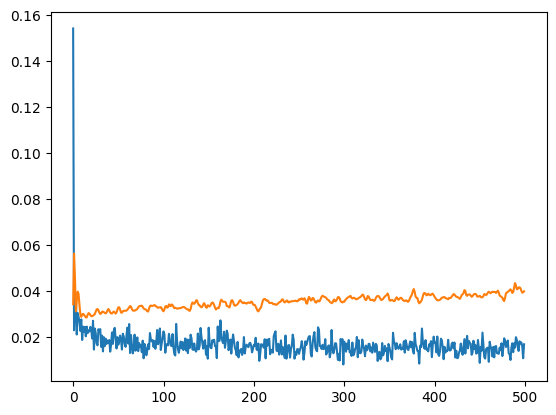

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [52]:
# here the gap between train and test loss is very less

In [53]:
# lets try with p = 0.5

In [54]:
model = Sequential()

In [55]:
model.add(Dense(128, activation='relu', input_dim=1))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mse'])

In [61]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step - loss: 0.1524 - mse: 0.1524 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0817 - val_mse: 0.0817
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0666 - mse: 0.0666 - val_loss: 0.0827 - val_mse: 0.0827
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0662 - mse: 0.0662 - val_loss: 0.0416 - val_mse: 0.0416
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0330 - val_mse: 0.0330
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0506 - val_mse: 0.0506
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0628 - mse: 0.0628 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0578 - ms

In [62]:
pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<Figure size 640x480 with 0 Axes>

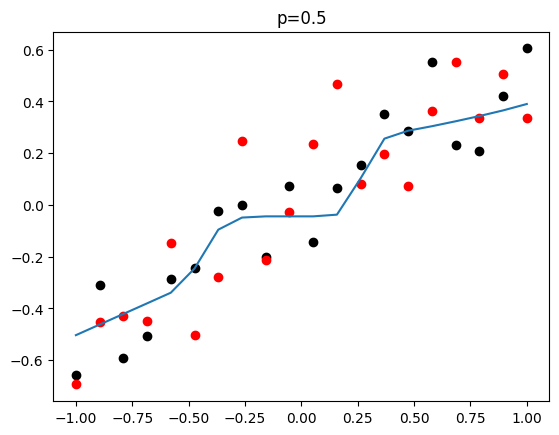

<Figure size 640x480 with 0 Axes>

In [64]:
plt.figure()
plt.title("p=0.5")
plt.scatter(X_train, y_train, c='black', label='train')
plt.scatter(X_test, y_test, label='test', c='red')
plt.plot(X_test, pred)
plt.figure()

In [65]:
_, train_mse = model.evaluate(X_train, y_train)
_, test_mse = model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0155 - mse: 0.0155
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0377 - mse: 0.0377


In [66]:
train_mse

0.015498971566557884

In [67]:
test_mse

0.03774188086390495

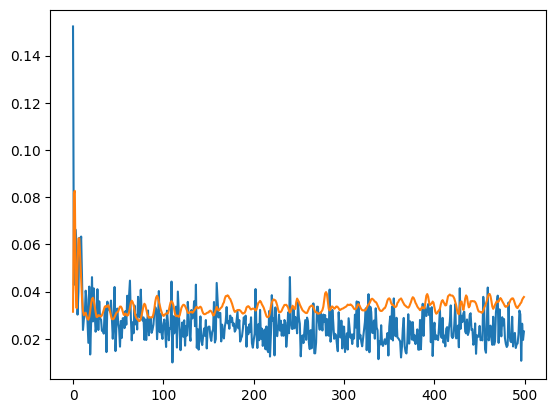

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [70]:
# if we take p =0.5 the loss in train and test is almost similar